# Setup

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
%cd "/content/drive/MyDrive/0.Cloud Computing and Streaming Tech/OCI AI/0.GoogleColab/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting"

/content/drive/MyDrive/0.Cloud Computing and Streaming Tech/OCI AI/0.GoogleColab/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting


In [106]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [80]:
#Load the dataset
df = pd.read_csv('bitcoin_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Time Series Index

In [81]:
# Convert "Date" to a datetime object with the right format YYYY-MM-DD or
# "%Y-%m-%d"
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [82]:
# Set Date as index
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [83]:
#Select a specific day in our df
df.loc["2021-01-09"]

,2021-01-09
Open,4.078864e+04
High,4.143635e+04
Low,3.898088e+04
Close,4.025455e+04
Adj Close,4.025455e+04
Volume,6.198416e+10


In [84]:
# Set the index when we import the data
df1 = pd.read_csv("bitcoin_price.csv", index_col="Date", parse_dates=True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [85]:
# Resample the data to a differnt time granuality
df.resample("W").mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07
...,...,...,...,...,...,...
2023-12-03,38038.414062,38743.479353,37766.444196,38399.994978,38399.994978,1.919430e+10
2023-12-10,43002.227121,44027.167411,42586.383929,43538.877232,43538.877232,2.692909e+10
2023-12-17,42369.368862,42969.940848,41148.103237,42020.472656,42020.472656,2.407050e+10


# Exploratory Data Analysis

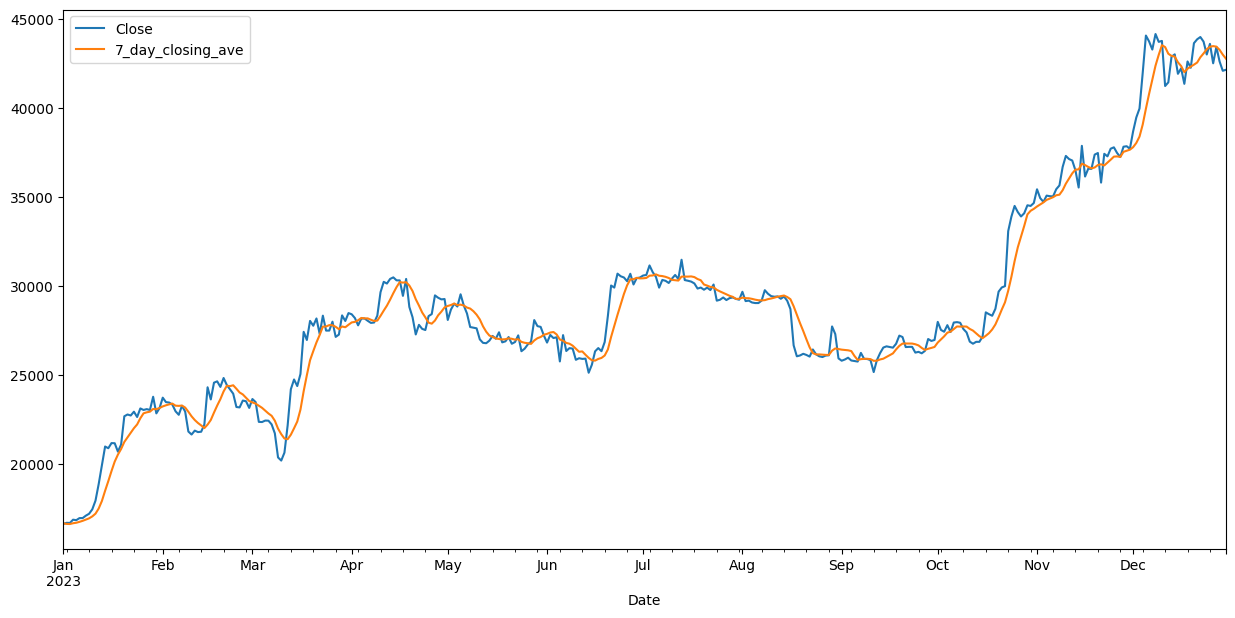

In [86]:
# Genreate a 7-day rolling average for the Closing Price
df['7_day_closing_ave'] = df['Close'].rolling(window=7).mean()

# Plot the Close Price and the 7 day rolling average
df[['Close', '7_day_closing_ave']].loc['2023'].plot(figsize=(15, 7))
plt.show()

In [87]:
# Find the moth with the highest closing average
df.resample('ME').max()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [88]:
# Preview the last 5 rows of hte data set
df.tail()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_ave
Date,,,,,,,
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43486.929688
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43457.016183
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43279.688058
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,43008.473772
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945,42782.382254


In [89]:
# Compute the percentage change for the close variable
df["daily_returns_100%"] = df['Close'].pct_change() * 100

In [90]:
# Let's check which days had more than 10% chnage in price
df[abs(df['daily_returns_100%']) > 10]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_ave,daily_returns_100%
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022


# Data Visualization

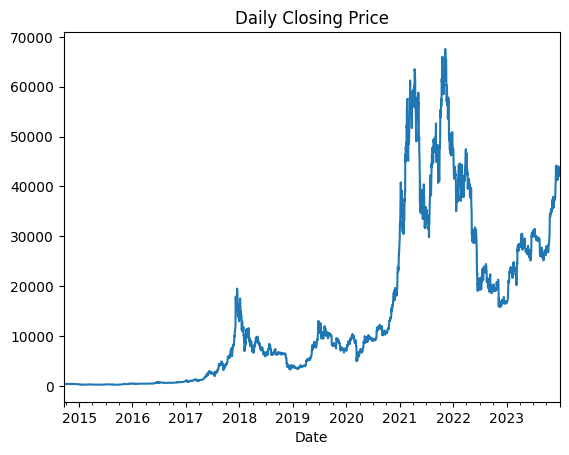

In [91]:
# Daily closing price plot
df["Close"].plot(title = "Daily Closing Price")
plt.show()

In [92]:
# Creae a variable for the 30 day rolling average
df["30_day_rolling_avg"] = df["Volume"].rolling(window=30).mean()

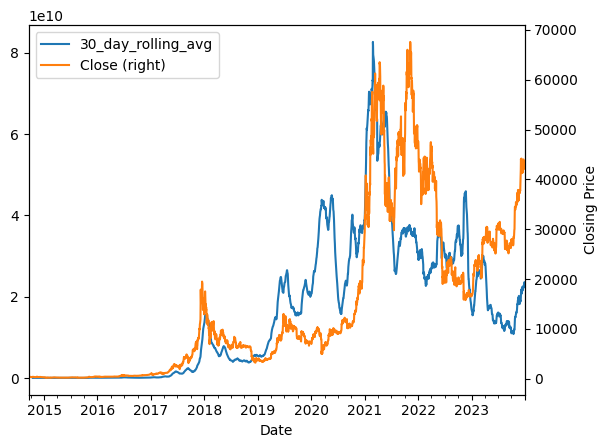

In [93]:
# Plot the Closing Price and the 30 day rolling volume
df[["30_day_rolling_avg"]].plot(legend=True)
ax = df["Close"].plot(secondary_y = True, legend=True)
ax.set_ylabel("Closing Price")
plt.show()

In [94]:
# Perform correlation between closing price and 30 day rolling volume
print(df['30_day_rolling_avg'].corr(df['Close']))
df[['Close', '30_day_rolling_avg']].corr()

0.750445379618605


,Close,30_day_rolling_avg
Close,1.000000,0.750445
30_day_rolling_avg,0.750445,1.000000


This is the Person Correlation which is often is not ideal for Time Series. Check out Spearman Correlation

If we do the Pearson Correlation, It's still 90% correct

# Data Manipulation

In [95]:
# Identify missing values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_closing_ave,6
daily_returns_100%,1
30_day_rolling_avg,29


In [96]:
# Fill the missing values with the net obersations
# Day 29 is missing
# Day 30 we have value
# Day 29 has now the value of day 30

#df["30_day_rolling_avg"].fillna(method="bfill", inplace=True)
df["30_day_rolling_avg"] = df["30_day_rolling_avg"].bfill()


In [97]:
# Interpolate values - look at both values (before and after)
df["7_day_closing_ave"] = df["7_day_closing_ave"].interpolate(method="linear")

In [98]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_closing_ave,6
daily_returns_100%,1
30_day_rolling_avg,0


In [99]:
# Fetch the index
#df.index
df.index.dayofweek

Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       ...
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
      dtype='int32', name='Date', length=3392)

In [100]:
# Extract time variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# Set a variable for weekend
# Set astype to integer to have binary
df['is_weekend'] = df['weekday_numeric'].isin([5, 6]).astype(int)

df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_ave,daily_returns_100%,30_day_rolling_avg,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,1


In [101]:
# Feature Engineering - Lagged Variables
# Past event influencing the future like seeng an ad today and buying tomorrow
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_ave,daily_returns_100%,30_day_rolling_avg,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend,lag_1,lag_2
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,0,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,0,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,0,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,1,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,1,408.903992,394.795990


# Seasonality

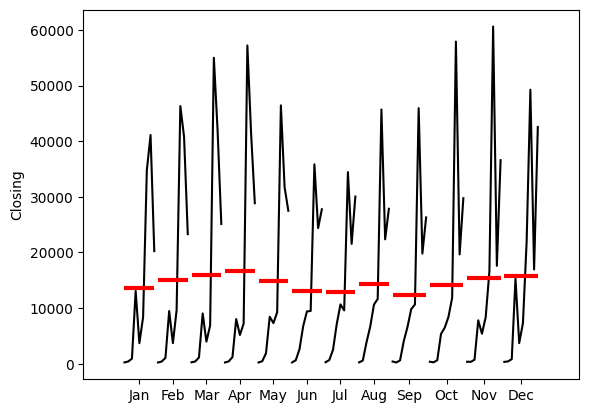

In [102]:
# Monthly seasonality
# df['Close'].resample('ME').mean()
month_plot(df['Close'].resample('ME').mean(),
           ylabel="Closing")

plt.show()

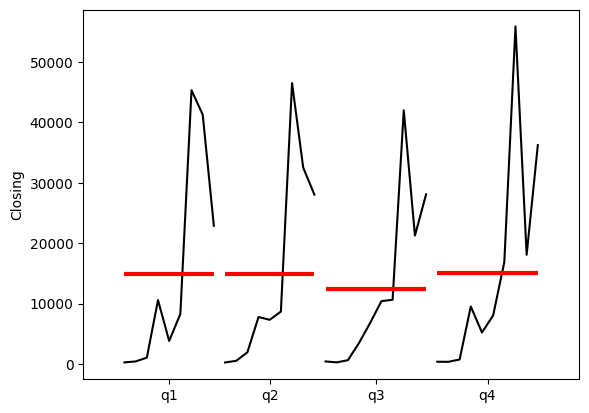

In [103]:
# Quarter plot
quarter_plot(df['Close'].resample('QE').mean(),
             ylabel="Closing")

plt.show()

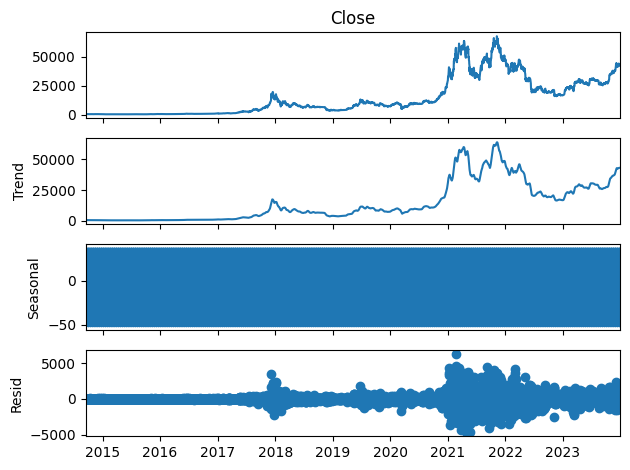

In [104]:
# Seasonal decomposition for df['Adj. Close']
seasonal_decompose(df['Close'], model='additive', period=12).plot()
plt.show()

Seasonal_decompose only allows 1 seasonality

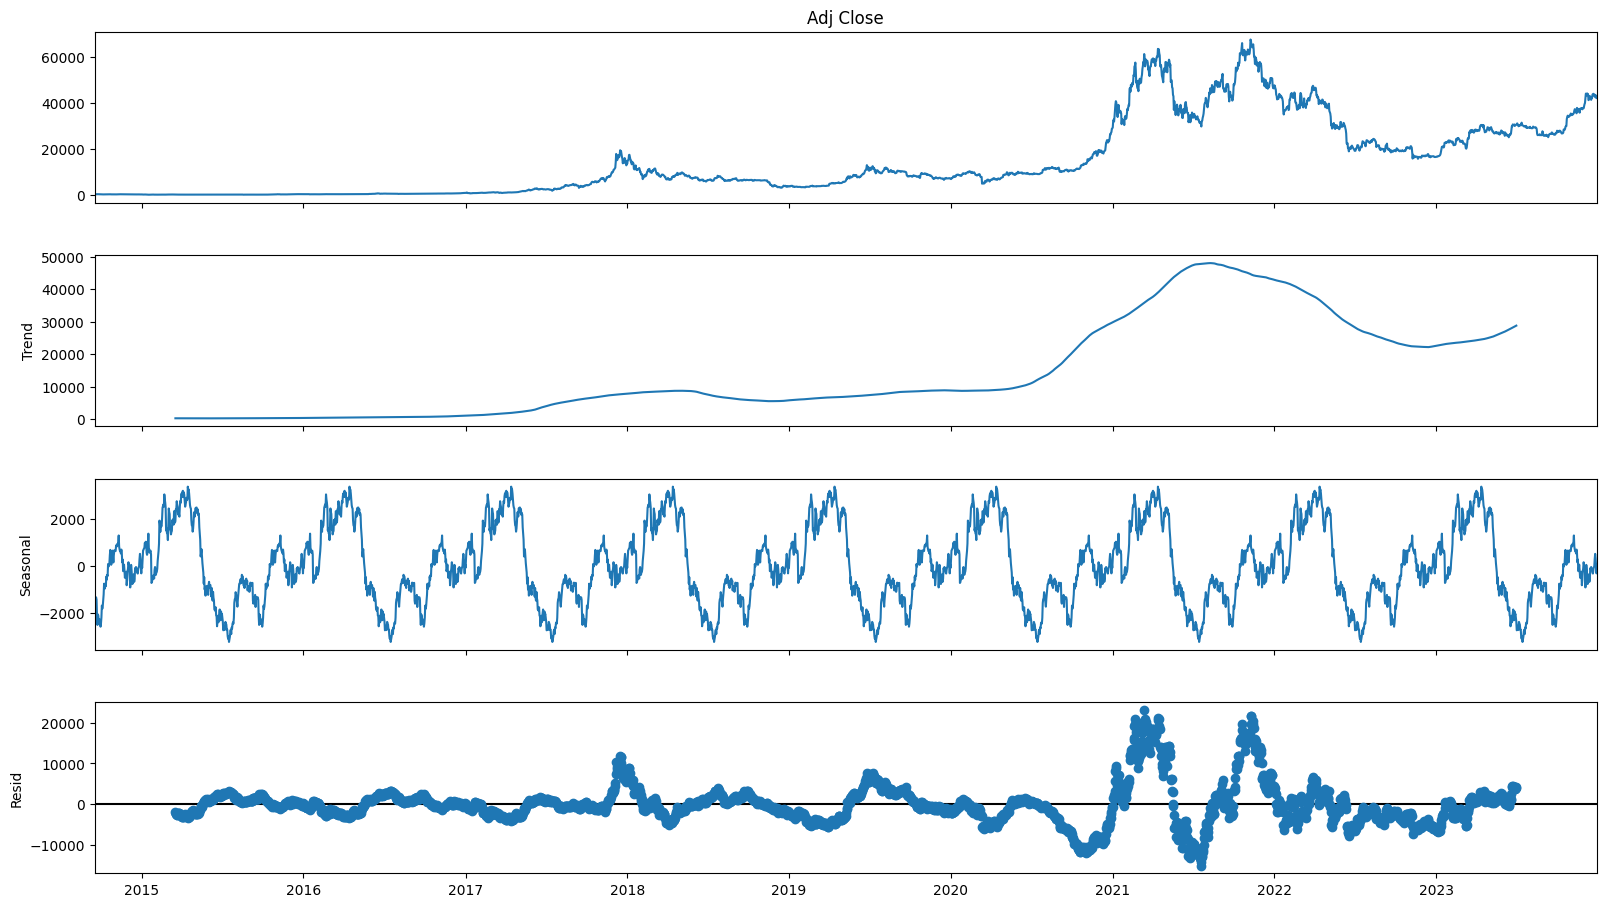

In [105]:
# Seasonal decomposition for df['Adj. Close']
decomposition = seasonal_decompose(df['Adj Close'],
                                   model='additive',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()

# Auto-correlation

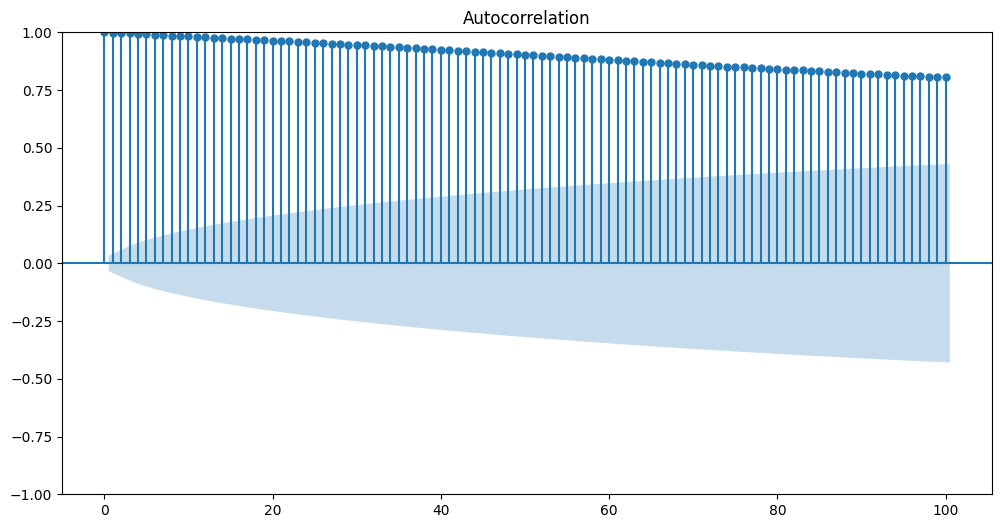

In [107]:
# Plot the ACF of the Bitcoin Adj Close
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['Adj Close'],lags = 100, ax=ax)
plt.show()

# Partial Auto-Correlation

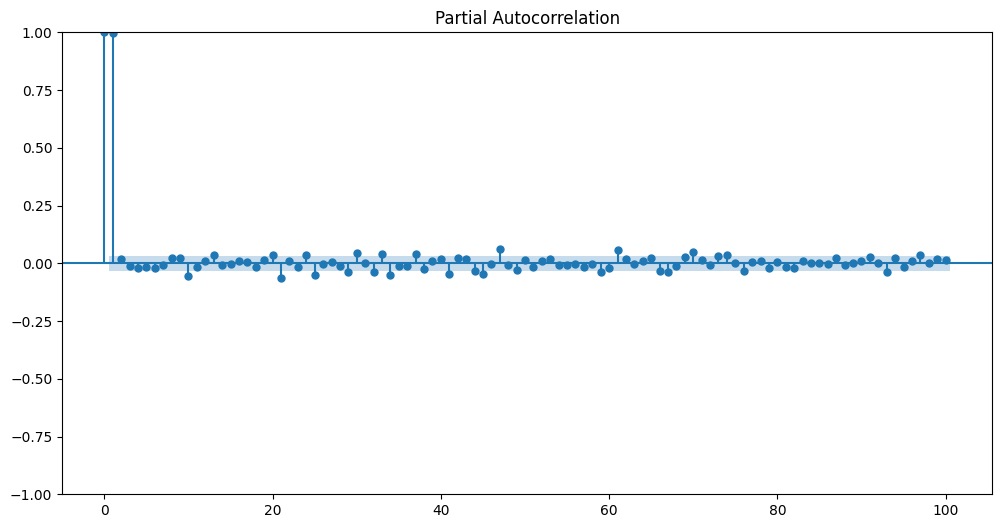

In [108]:
# PACF for bitcoin adj close
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df['Adj Close'], lags = 100, ax=ax)
plt.show()

The only relevant information for the price of bitcoin is what happened the day before